In [11]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import prepare
import acquire


import warnings
warnings.filterwarnings('ignore')

In [12]:
telco = acquire.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [13]:
telco['contract_type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64

In [14]:
categorical_columns = []
bin_cats = []
mult_cats = []
numerical_columns = []
for col in telco.columns:
    if telco[col].dtype == 'object':
        categorical_columns.append(col)
        if telco[col].value_counts().size > 2:
            mult_cats.append(col)
        else:
            bin_cats.append(col)
    else:
        numerical_columns.append(col)

In [15]:
categorical_columns

['customer_id',
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [16]:
telco = prepare.prep_telco(telco)

In [18]:
train, validate, test = prepare.my_train_test_split(telco, 'churn_Yes')

In [19]:
train.shape, validate.shape, test.shape

((4225, 30), (1409, 30), (1409, 30))

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             4225 non-null   object 
 1   senior_citizen                          4225 non-null   int64  
 2   tenure                                  4225 non-null   int64  
 3   monthly_charges                         4225 non-null   float64
 4   total_charges                           4225 non-null   float64
 5   contract_type                           4225 non-null   object 
 6   internet_service_type                   4225 non-null   object 
 7   churn_Yes                               4225 non-null   uint8  
 8   gender_Male                             4225 non-null   uint8  
 9   partner_Yes                             4225 non-null   uint8  
 10  dependents_Yes                          4225 non-null   u

In [22]:
observed1 = pd.crosstab(train.tech_support_Yes, train.churn_Yes)
observed1

churn_Yes,0,1
tech_support_Yes,,
0,2076,926
1,1028,195


Text(0.5, 0, 'Tech Support')

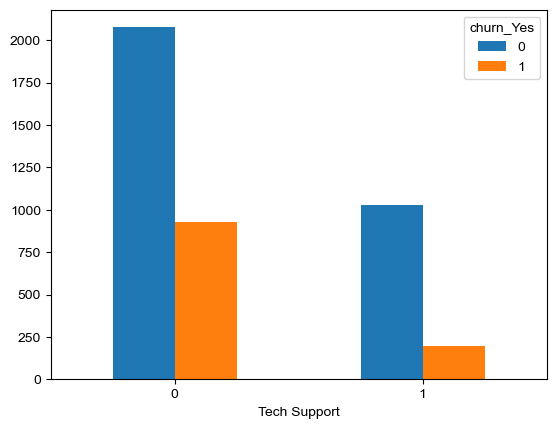

In [24]:
barplot1 = observed1.plot.bar(rot=0)
plt.xlabel('Tech Support')

<AxesSubplot:xlabel='churn_encoded', ylabel='count'>

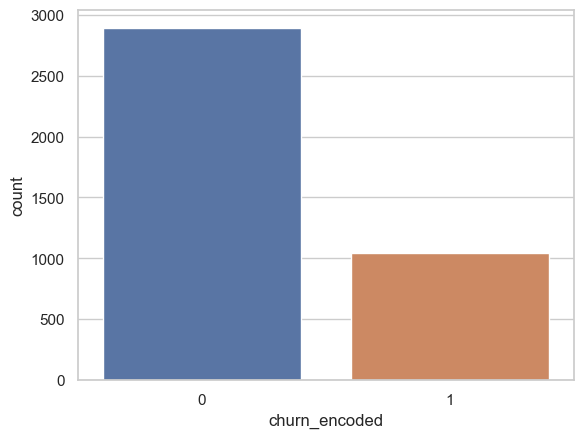

In [9]:
sns.set_theme(style="whitegrid")
sns.countplot(x=train["churn_encoded"])

<AxesSubplot:xlabel='churn_encoded', ylabel='count'>

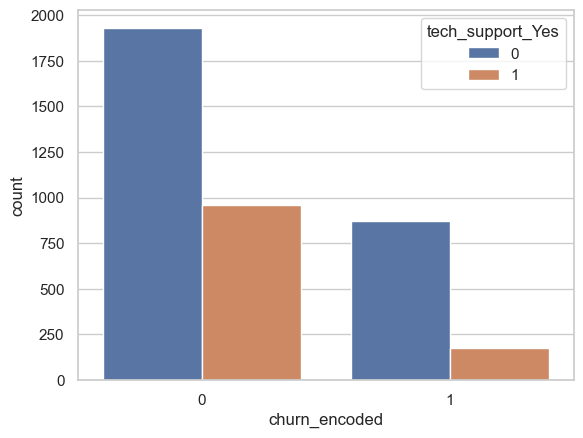

In [10]:
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x="churn_encoded", hue="tech_support_Yes")
plt.title('Paperless')
plt.xlabel('Churn')
plt.ylabel('# of Customers')
plt.legend()

We will investigate the question of whether having tech support is independent of churn.

Ho
 (Null Hypothesis): tech support is independent of churn.

Ha
 (Alternative Hypothesis): tech support is dependent on churn.

In [11]:
alpha = .05
chi2, p, degf, expected = stats.chi2_contingency(observed1)
chi2, p, degf, expected

(99.12006574346024,
 2.376480997030356e-23,
 1,
 array([[2054.61468123,  743.38531877],
        [ 836.38531877,  302.61468123]]))

In [12]:
if p < alpha:
    print('Reject the null')
else:
    print('Fail to reject null')

Reject the null


In [13]:
observed2 = pd.crosstab(train.contract_type, train.churn_encoded)
observed2

churn_encoded,0,1
contract_type,,
Month-to-month,1238,927
One year,726,89
Two year,927,30


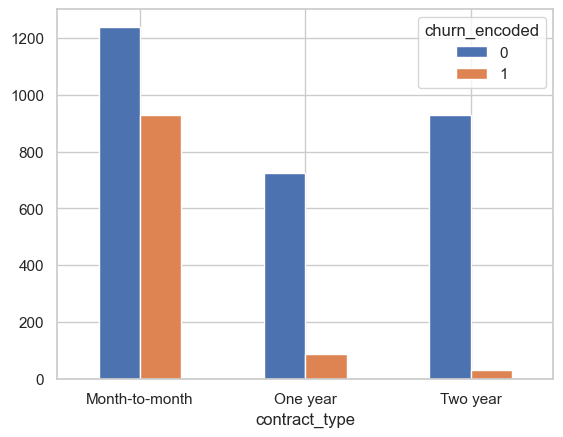

In [14]:
barplot2 = observed2.plot.bar(rot=0)

<AxesSubplot:xlabel='churn_encoded', ylabel='count'>

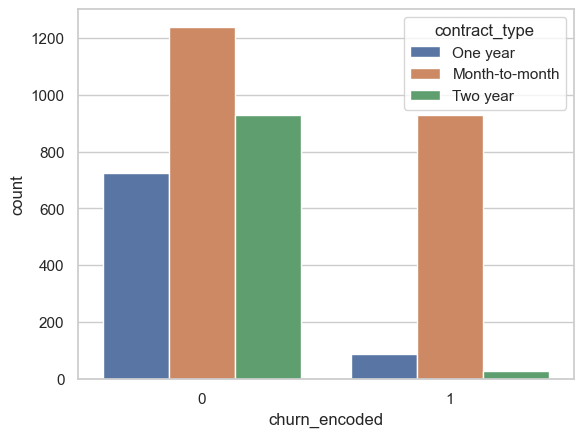

In [15]:
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x="churn_encoded", hue="contract_type")

We will investigate the question of whether contract type is independent of churn.

Ho
 (Null Hypothesis): contract type is independent of churn.

Ha
 (Alternative Hypothesis): contract is dependent on churn.

In [16]:
alpha = .05
chi2, p, degf, expected = stats.chi2_contingency(observed2)
chi2, p, degf, expected

(664.6572486352288,
 4.693667062132269e-145,
 2,
 array([[1589.79298959,  575.20701041],
        [ 598.46710693,  216.53289307],
        [ 702.73990348,  254.26009652]]))

In [17]:
if p < alpha:
    print('Reject the null')
else:
    print('Fail to reject null')

Reject the null


In [18]:
observed3 = pd.crosstab(train.senior_citizen, train.churn_encoded)
observed3

churn_encoded,0,1
senior_citizen,,
0,2527,775
1,364,271


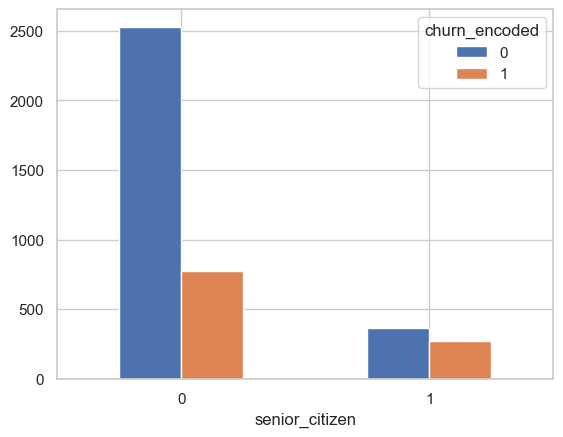

In [19]:
barplot3 = observed3.plot.bar(rot=0)

<AxesSubplot:xlabel='churn_encoded', ylabel='count'>

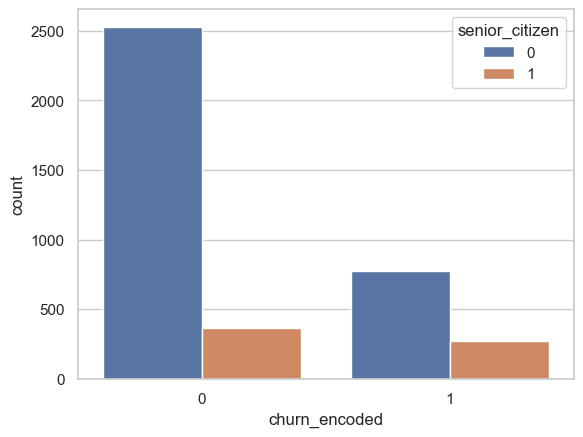

In [20]:
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x="churn_encoded", hue="senior_citizen")

In [21]:
observed4 = pd.crosstab(train.paperless_billing, train.churn_encoded)
observed4

churn_encoded,0,1
paperless_billing,,
No,1347,266
Yes,1544,780


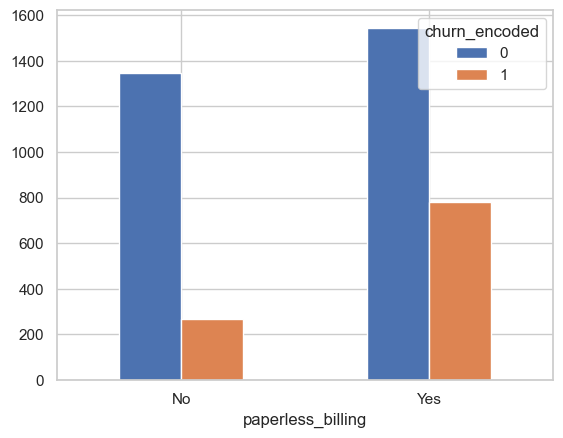

In [22]:
barplot4 = observed4.plot.bar(rot=0)

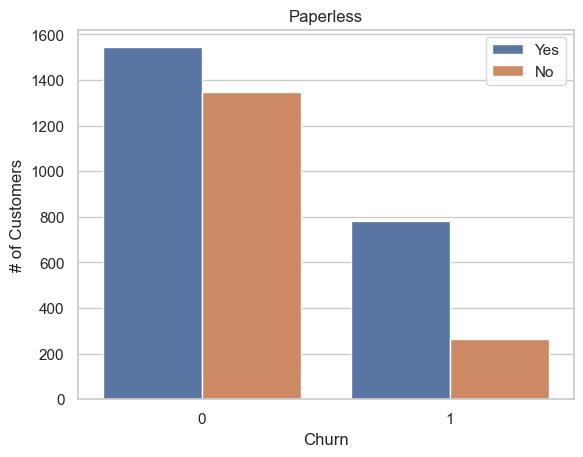

In [23]:
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x="churn_encoded", hue="paperless_billing")
plt.title('Paperless')
plt.xlabel('Churn')
plt.ylabel('# of Customers')
plt.legend()